In [1]:
import cv2
import os
import numpy as np

from matplotlib import pyplot as plt


In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [33]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


In [38]:
from matplotlib import pyplot as plt
print(type(x_train[0][0][0][0]))

<class 'numpy.uint8'>


0


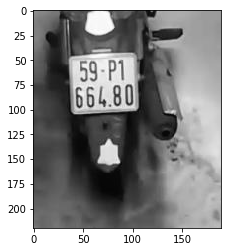

In [56]:
a = cv2.imread('M:\\Project2_data\\GreenParking\\1.jpg')
b = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
img = b[30:250,110:300]
c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(np.sum(c[:,:,0]-c[:,:,1]))
plt.imshow(c,cmap = 'gray')

In [71]:
img_path = 'M:\\Project2_data\\GreenParking\\'
# image = cv2.imread(img_path,0)
# (303, 472)
    count = '1'
    count_str = 1
    for i in os.listdir(img_path):
    image = cv2.imread(img_path+i,0)
    try:
        assert image == None
        continue
    except:
        img = image[30:250,110:300]
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.imwrite(('M:\\Project2_data\\crop\\'+count+'.jpg'), img) 
        count_str += 1
        count = str(count_str)

In [70]:
a = cv2.imread(img_path+'1749.jpg')
print(a)

None


In [4]:
import cv2
import os
img_path = 'M:\\Project2_data\\GreenParking\\'
count = '1'
count_str = 1
for i in os.listdir(img_path):
    os.rename(img_path+i,img_path+count+'.jpg')
    count_str += 1
    count = str(count_str)
    

In [ ]:
import os
import hashlib

import requests
from bs4 import BeautifulSoup


page_url = 'https://www.nytimes.com/section/todayspaper'

# Download page html 
page_data = requests.get(page_url).text

# Find all links in page
images_urls = [
    image.attrs.get('src')
    for image in BeautifulSoup(page_data, 'lxml').find_all('img')
]

# Clean empty links (<img src="" /> <img> etc)
images_urls = [
    image_url
    for image_url in images_urls
    if image_url and len(image_url)>0
]

# Download files
def download_image(source_url, dest_dir):
    # TODO: add filename extension
    image_name = hashlib.md5(source_url.encode()).hexdigest()

    with open(os.path.join(dest_dir, image_name), 'wb') as f:
        image_data = requests.get(source_url).content
        f.write(image_data)


for image_url in images_urls:
    download_image(image_url, './tmp')